<a href="https://colab.research.google.com/github/mohammedzmar/airline_satisfaction_visualization/blob/main/Airlines_Satisfaction_visualization_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Airlines Satisfaction visualization

                               column   dtypes  nunique  sum_null
0                        satisfaction   object        2         0
1                              Gender   object        2         0
2                       Customer Type   object        2         0
3                                 Age    int64       75         0
4                      Type of Travel   object        2         0
5                               Class   object        3         0
6                     Flight Distance    int64     5398         0
7                        Seat comfort    int64        6         0
8   Departure/Arrival time convenient    int64        6         0
9                      Food and drink    int64        6         0
10                      Gate location    int64        6         0
11              Inflight wifi service    int64        6         0
12             Inflight entertainment    int64        6         0
13                     Online support    int64        6         0
14        

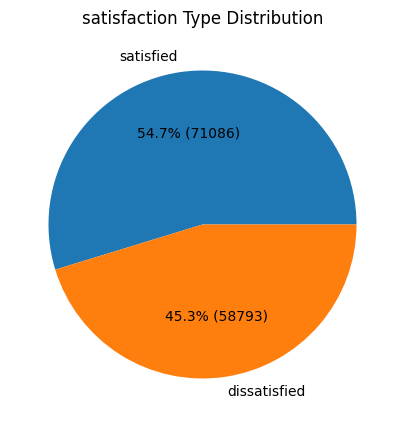

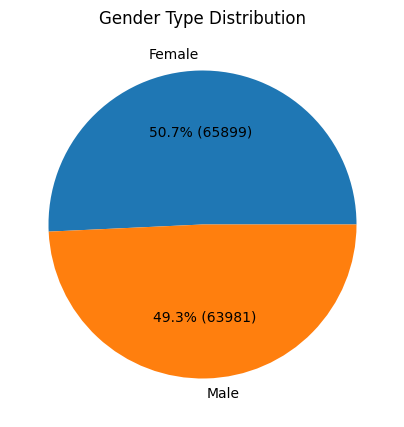

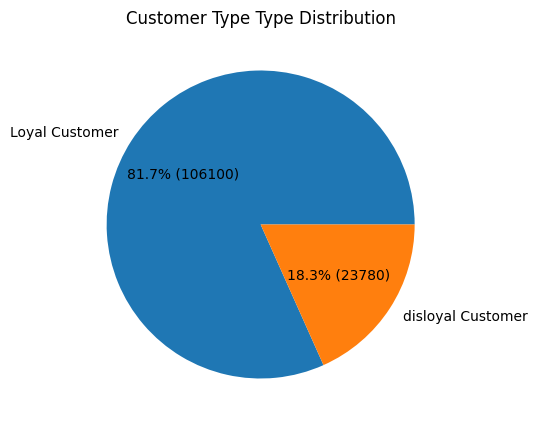

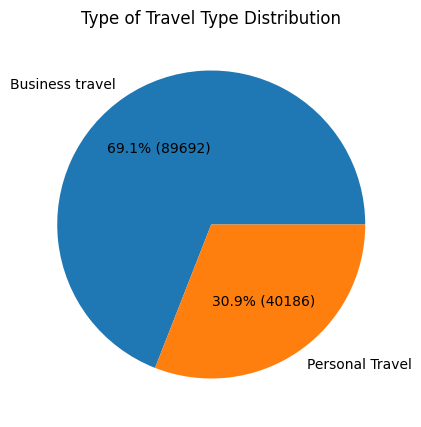

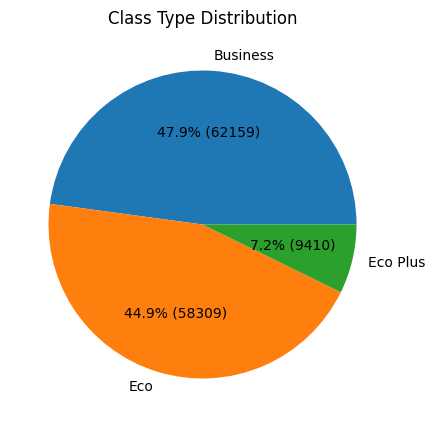

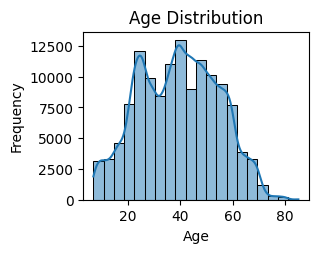

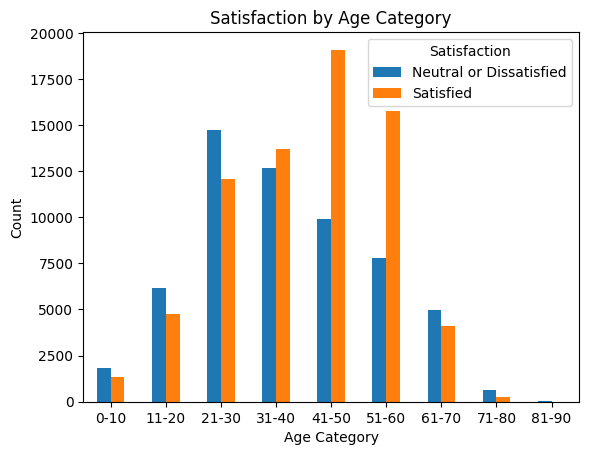

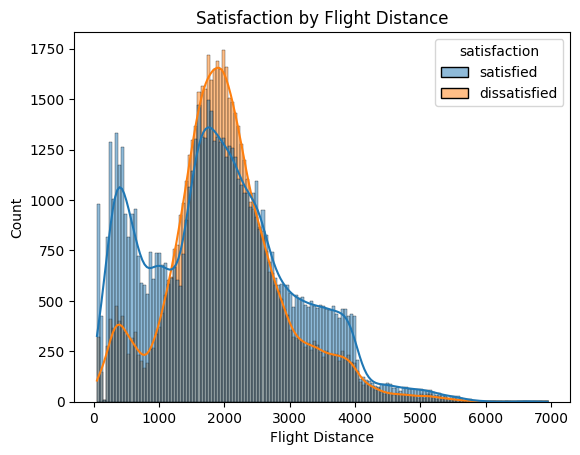

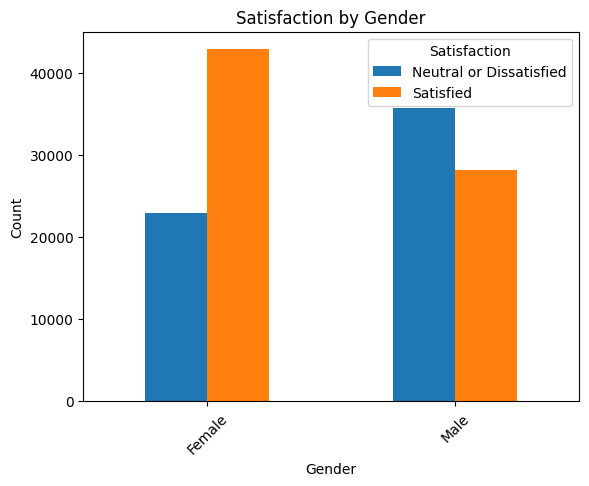

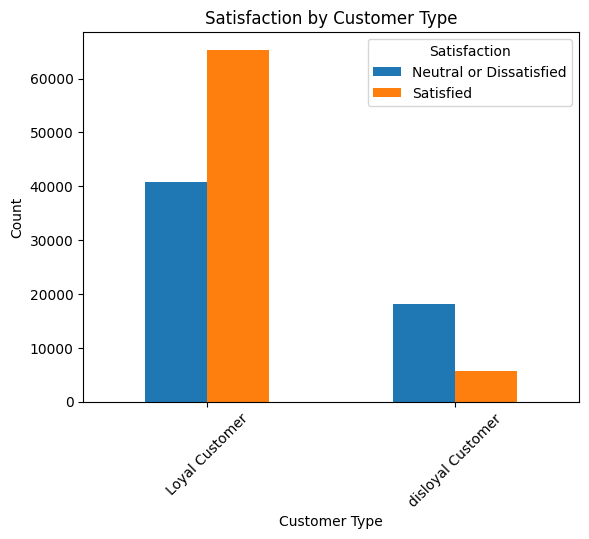

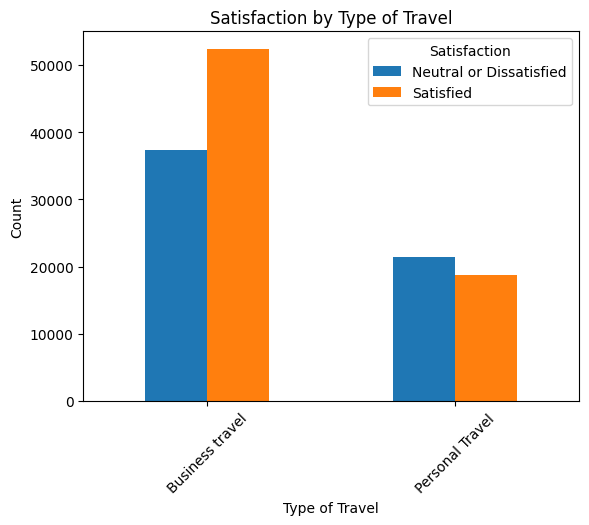

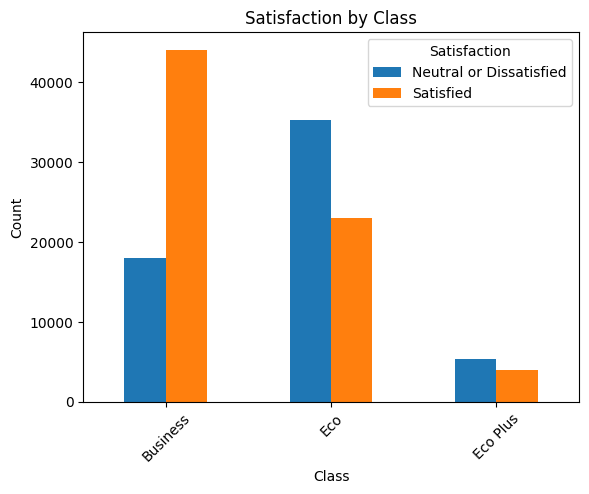

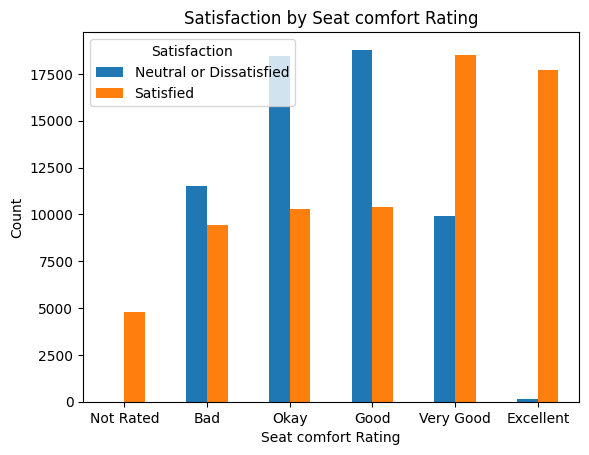

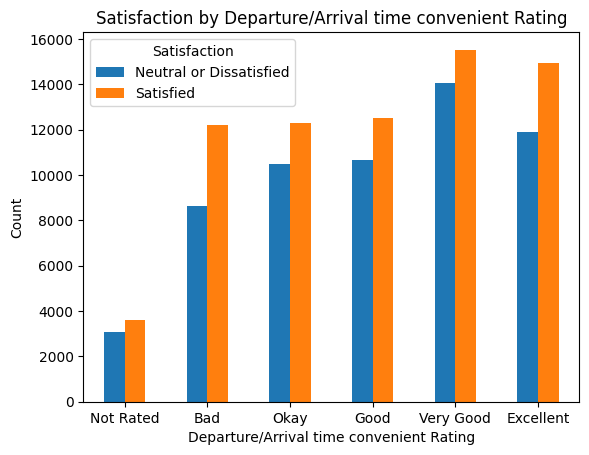

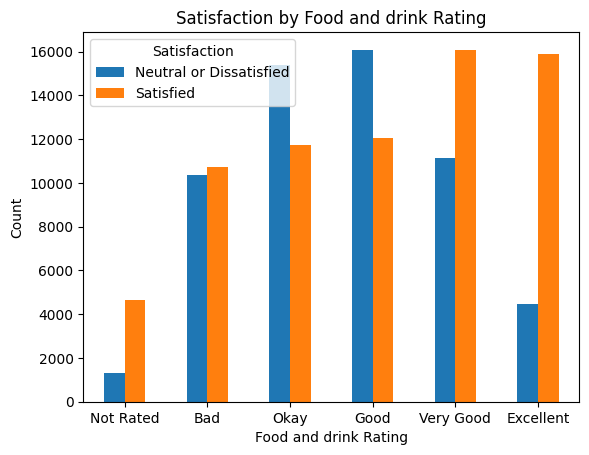

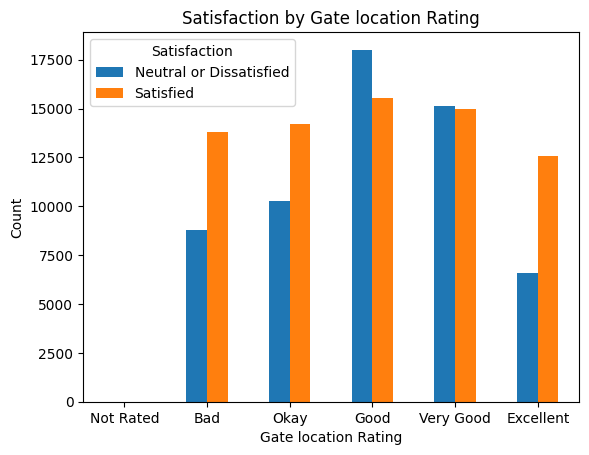

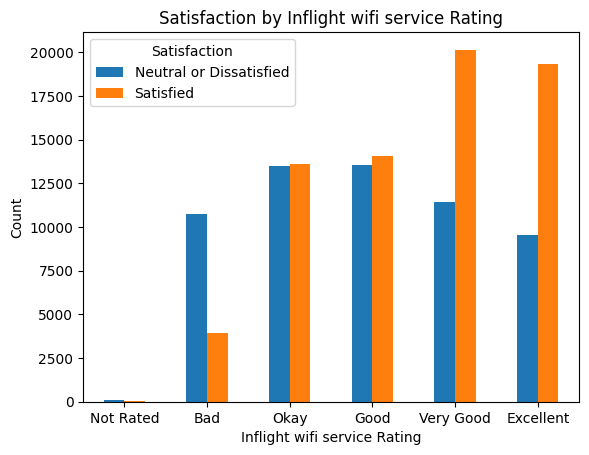

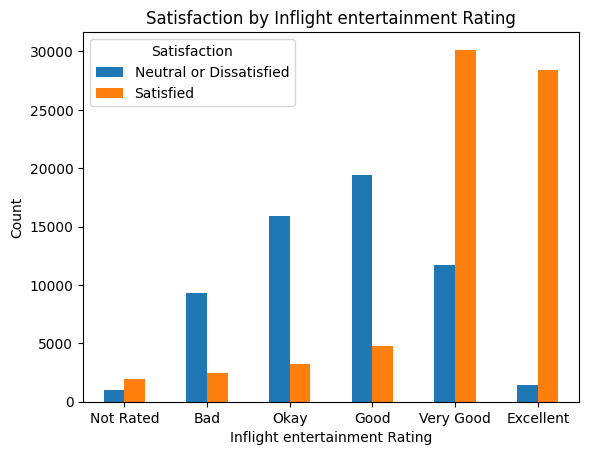

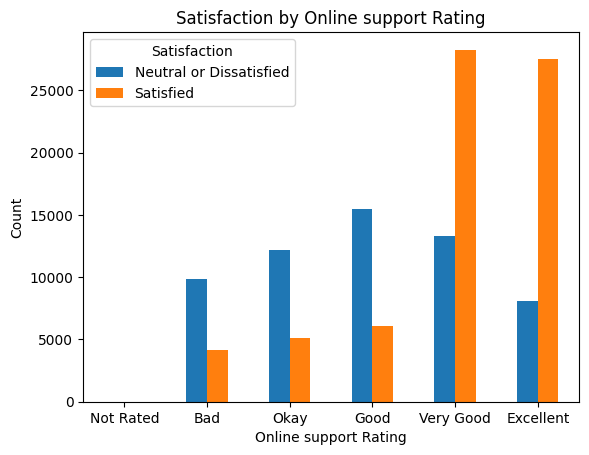

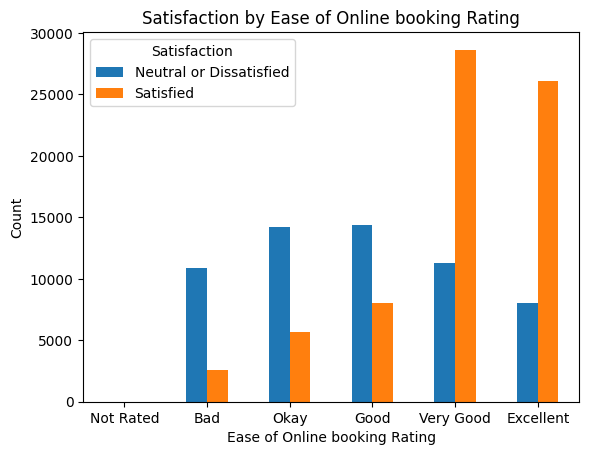

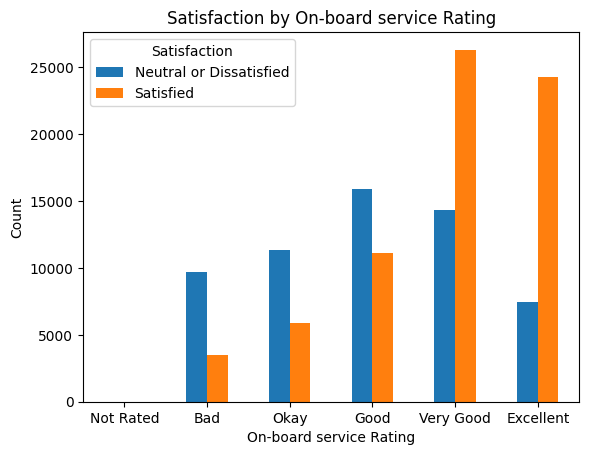

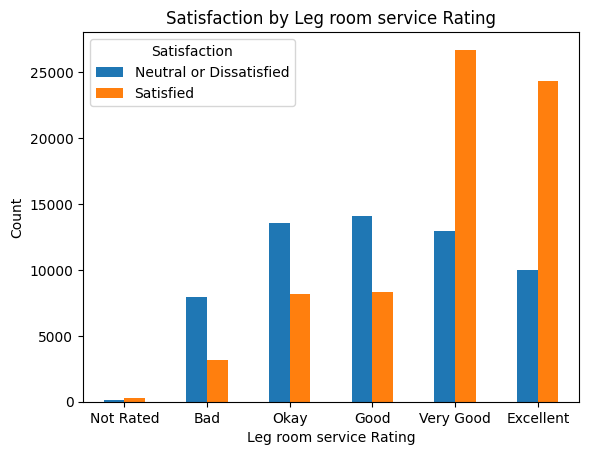

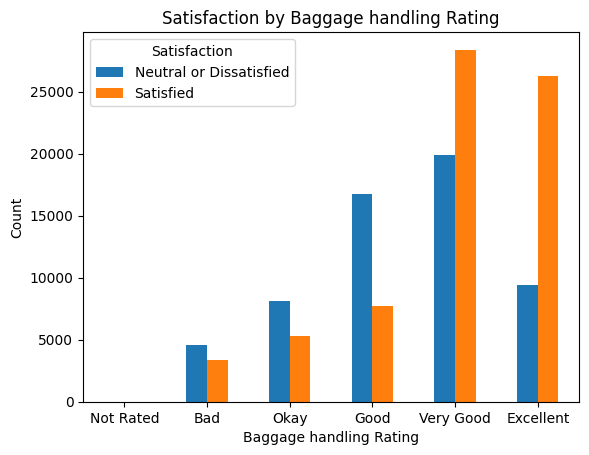

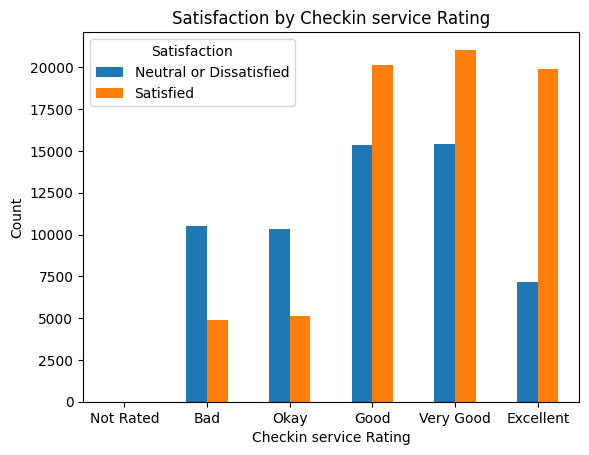

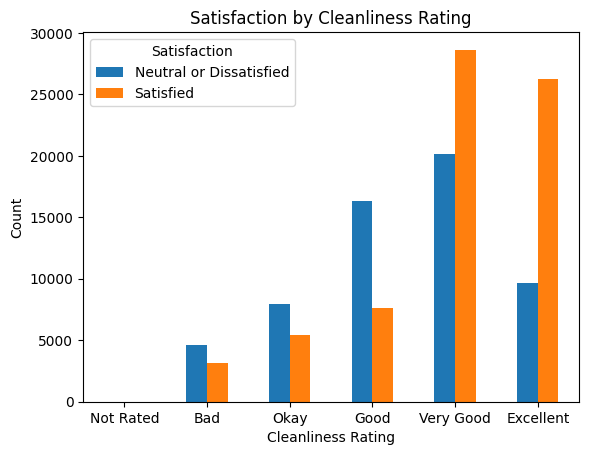

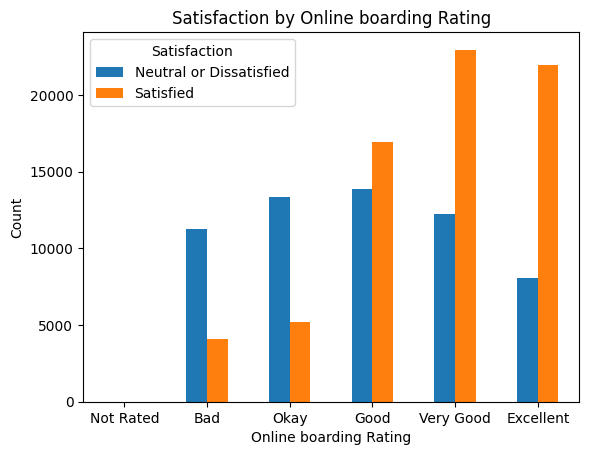

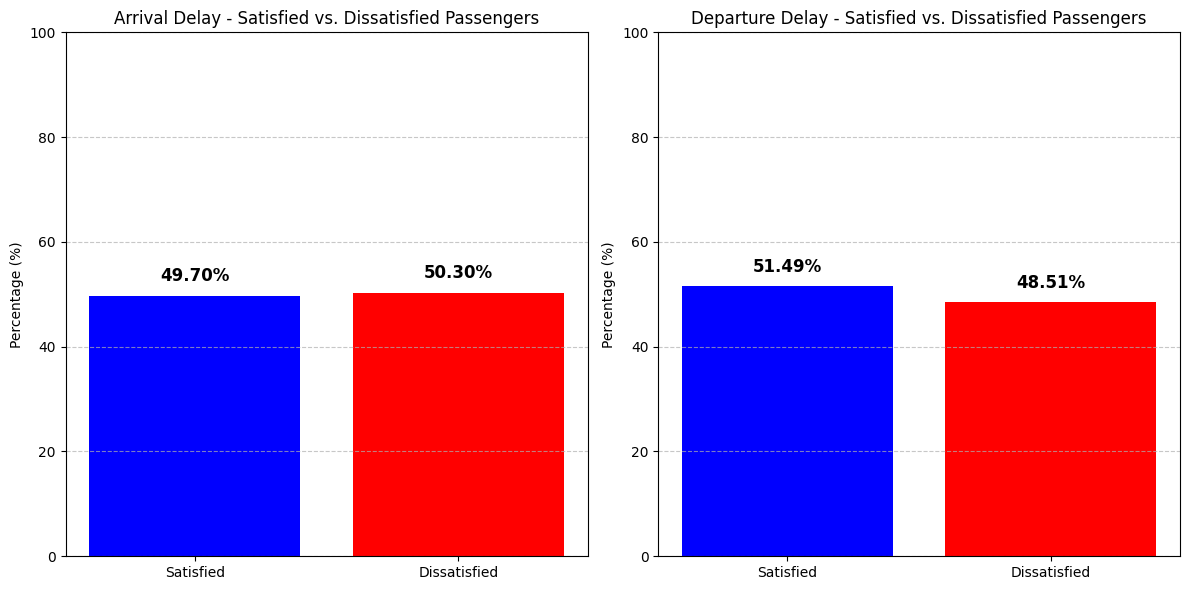

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
class Viz:
  def __init__(self, file_path):
    self.file_path = file_path
    self.df = None
    self.read_file()
    self.data_summary()
    self.plot_categories_distribution()
    self.plot_age_distribution()
    self.plot_age_groups_visualization()
    self.plot_flight_distances_satisfaction()
    self.plot_categories_grouped()
    self.plot_rating_columns_visualization()
    self.plot_satisfied_withdelay_vs_dissatisfied()

  def read_file(self):
    self.df = pd.read_csv(self.file_path)

# data exploration
  def data_summary(self):
    data=[]
    columns=self.df.columns
    for column in columns:
        dtypes=self.df[column].dtypes
        nunique=self.df[column].nunique()
        sum_null=self.df[column].isnull().sum()
        data.append([column,dtypes,nunique,sum_null])
    df_summary=pd.DataFrame(data)
    df_summary.columns=['column','dtypes','nunique','sum_null']
    print(df_summary)
    return df_summary

# Plot the distribution of passenger ages
  def plot_age_distribution(self):
      plt.subplot(2, 2, 1)
      sns.histplot(self.df['Age'], bins=20, kde=True)
      plt.title('Age Distribution')
      plt.xlabel('Age')
      plt.ylabel('Frequency')
      plt.show()
# Plot the satisfaction levels of passengers by age category
  def plot_age_groups_visualization(self):
      age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
      age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
      self.df['Age Category'] = pd.cut(self.df['Age'], bins=age_bins, labels=age_labels)
      age_satisfaction = self.df.groupby(['Age Category', 'satisfaction']).size().unstack()
      age_satisfaction.plot(kind='bar')
      plt.title('Satisfaction by Age Category')
      plt.xlabel('Age Category')
      plt.ylabel('Count')
      plt.legend(title='Satisfaction', labels=['Neutral or Dissatisfied', 'Satisfied'])
      plt.xticks(rotation=0)
      plt.show()

# Plot the distribution of categorical columns .
  def plot_categories_distribution(self):
      columns_to_visualize = ['satisfaction', 'Gender', 'Customer Type','Type of Travel','Class']
      for column in columns_to_visualize:
        category_counts = self.df[column].value_counts()
        plt.figure(figsize=(5, 5))
        plt.pie(category_counts, labels=category_counts.index, autopct=lambda p:f'{p:.1f}% ({int(p*sum(category_counts)/100)})')
        plt.title(f'{column} Type Distribution')
        plt.show()
#plot flight distance and satisfaction
  def plot_flight_distances_satisfaction(self):
      sns.histplot(data=self.df, x='Flight Distance', hue='satisfaction', kde=True)
      plt.title('Satisfaction by Flight Distance')
      plt.xlabel('Flight Distance')
      plt.ylabel('Count')
      plt.show()

#plot all columns that have categories groupud by satisfaction.
  def plot_categories_grouped(self):
      columns_to_visualize = ['Gender','Customer Type','Type of Travel','Class']
      for column in columns_to_visualize:
        grouped_data = self.df.groupby([column, 'satisfaction']).size().unstack()
        grouped_data.plot(kind='bar')
        plt.title(f'Satisfaction by {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Satisfaction', labels=['Neutral or Dissatisfied', 'Satisfied'])
        plt.xticks(rotation=45)
        plt.show()
#plot all columns have ratings.
  def plot_rating_columns_visualization(self):
      rating_columns = [col for col in self.df.columns if self.df[col].dtype == int and self.df[col].min() >= 0 and self.df[col].max() <= 5]
      rating_labels = {0: 'Not Rated', 1: 'Bad', 2: 'Okay', 3: 'Good', 4: 'Very Good', 5: 'Excellent'}

      for column in rating_columns:
          self.df[f'{column}_Rating'] = self.df[column].map(rating_labels)
          rating_order = ['Not Rated', 'Bad', 'Okay', 'Good', 'Very Good', 'Excellent']
          self.df[f'{column}_Rating'] = pd.Categorical(self.df[f'{column}_Rating'], categories=rating_order, ordered=True)
          grouped_data = self.df.groupby([f'{column}_Rating', 'satisfaction']).size().unstack()
          grouped_data.plot(kind='bar')
          plt.title(f'Satisfaction by {column} Rating')
          plt.xlabel(f'{column} Rating')
          plt.ylabel('Count')
          plt.legend(title='Satisfaction', labels=['Neutral or Dissatisfied', 'Satisfied'])
          plt.xticks(rotation=0)
          plt.show()

#Plot the percentages of passengers satisfied and dissatisfied with both arrival and departure delays.
  def plot_satisfied_withdelay_vs_dissatisfied(self):
      satisfied_with_arrival_delay = self.df[(self.df['satisfaction'] == 'satisfied') & (self.df['Arrival Delay in Minutes'] > 0)]
      dissatisfied_with_arrival_delay = self.df[(self.df['satisfaction'] == 'dissatisfied') & (self.df['Arrival Delay in Minutes'] > 0)]
      total_passengers_with_arrival_delay = len(self.df[self.df['Arrival Delay in Minutes'] > 0])
      percentage_satisfied_with_arrival_delay = (len(satisfied_with_arrival_delay) / total_passengers_with_arrival_delay) * 100
      percentage_dissatisfied_with_arrival_delay = (len(dissatisfied_with_arrival_delay) / total_passengers_with_arrival_delay) * 100
      satisfied_with_departure_delay = self.df[(self.df['satisfaction'] == 'satisfied') & (self.df['Departure Delay in Minutes'] > 0)]
      dissatisfied_with_departure_delay = self.df[(self.df['satisfaction'] == 'dissatisfied') & (self.df['Departure Delay in Minutes'] > 0)]
      total_passengers_with_departure_delay = len(self.df[self.df['Departure Delay in Minutes'] > 0])
      percentage_satisfied_with_departure_delay = (len(satisfied_with_departure_delay) / total_passengers_with_departure_delay) * 100
      percentage_dissatisfied_with_departure_delay = (len(dissatisfied_with_departure_delay) / total_passengers_with_departure_delay) * 100

      fig, axs = plt.subplots(1, 2, figsize=(12, 6))

      axs[0].bar(['Satisfied', 'Dissatisfied'],
                [percentage_satisfied_with_arrival_delay, percentage_dissatisfied_with_arrival_delay],
                color=['blue', 'red'])
      axs[0].set_title('Arrival Delay - Satisfied vs. Dissatisfied Passengers')
      axs[0].set_ylabel('Percentage (%)')
      axs[0].set_ylim(0, 100)
      axs[0].grid(axis='y', linestyle='--', alpha=0.7)

      for i, percentage in enumerate([percentage_satisfied_with_arrival_delay, percentage_dissatisfied_with_arrival_delay]):
          axs[0].text(i, percentage + 2, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

      axs[1].bar(['Satisfied', 'Dissatisfied'],
                [percentage_satisfied_with_departure_delay, percentage_dissatisfied_with_departure_delay],
                color=['blue', 'red'])
      axs[1].set_title('Departure Delay - Satisfied vs. Dissatisfied Passengers')
      axs[1].set_ylabel('Percentage (%)')
      axs[1].set_ylim(0, 100)
      axs[1].grid(axis='y', linestyle='--', alpha=0.7)

      for i, percentage in enumerate([percentage_satisfied_with_departure_delay, percentage_dissatisfied_with_departure_delay]):
          axs[1].text(i, percentage + 2, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
      plt.tight_layout()
      plt.show()




data_visualization = Viz('/content/Invistico_Airline.csv')

